In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

# visualization
import seaborn as sns 
plt.style.use('fivethirtyeight')
sns.set_style("white")


plt.rcParams['figure.figsize'] = (8,4) 
#plt.rcParams['axes.titlesize'] = 'large'

data = pd.read_csv('datasets_180_408_data.csv', index_col=False)

#data.head()

In [2]:
array = data.values
X = array[:,2:31]
y = array[:,0]

#
After encoding the class labels(diagnosis) in an array y, the malignant tumors are now represented as class 1(i.e prescence of cancer cells) and the benign tumors are represented as class 0 (i.e no cancer cells detection), respectively, illustrated by calling the transform method of LabelEncorder on two dummy variables.**

###
#
Assesing Model Accuracy: Split data into training and test sets
The simplest method to evaluate the performance of a machine learning algorithm is to use different training and testing datasets. Here I will
#
###
Split the available data into a training set and a testing set. (70% training, 30% test)
Train the algorithm on the first part,
#

##
make predictions on the second part and
evaluate the predictions against the expected results.
The size of the split can depend on the size and specifics of your dataset, although it is common to use 67% of the data for training and the remaining 33% for testing.

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#
From the pair plot in NB2, lot of feature pairs divide nicely the data to a similar extent, therefore, it makes sense to use one of the dimensionality reduction methods to try to use as many features as possible and maintain as much information as possible when working with only 2 dimensions. I will use PCA

In [4]:
from sklearn.model_selection import train_test_split

##Split data set in train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 29), (426,), (143, 29), (143,))

In [5]:
from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

C:\Users\piyush\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\piyush\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(Xs)


# 
Now, what we got after applying the linear PCA transformation is a lower dimensional subspace (from 3D to 2D in this case), where the samples are “most spread” along the new feature axes.

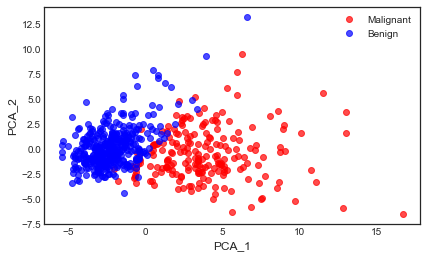

In [8]:
X_pca = pca.transform(Xs)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][data.target == 'M'],PCA_df['PCA_2'][data.target == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][data.target == 'B'],PCA_df['PCA_2'][data.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

In [11]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
#var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#print(var1)

# Deciding How Many Principal Components to Retain
In order to decide how many principal components should be retained, it is common to summarise the results of a principal components analysis by making a scree plot. More about scree plot can be found here, and hear

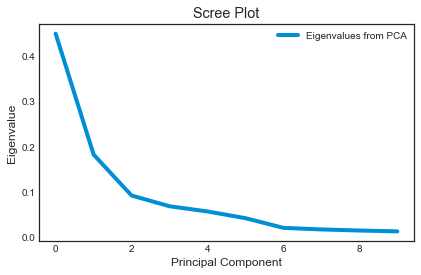

In [13]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
#var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#print(var1)

plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.show()


# Observation
The most obvious change in slope in the scree plot occurs at component 2, which is the “elbow” of the scree plot. Therefore, it cound be argued based on the basis of the scree plot that the first three components should be retained.

## A Summary of the Data Preprocing Approach used here:
1.assign features to a NumPy array X, and transform the class labels from their original string representation (M and B) into integers

2.Split data into training and test sets

3.Standardize the data.

4.Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix

5.Sort eigenvalues in descending order and choose the kk eigenvectors that correspond to the   kk largest eigenvalues where k is the number of dimensions of the new feature subspace       (k≤dk≤d).

6.Construct the projection matrix W from the selected k eigenvectors.

7.Transform the original dataset X via W to obtain a k-dimensional feature subspace Y.



It is common to select a subset of features that have the largest correlation with the class labels. The effect of feature selection must be assessed within a complete modeling pipeline in order to give you an unbiased estimated of your model's true performance. Hence, in the next section you will first be introduced to cross-validation, before applying the PCA-based feature selection strategy in the model building pipeline.